# To Do (project)
- [x] Environment preparation
- [x] Load Data
- [x] EDA
- [x] Prepare train and test datasets
- [x]Selection model
- [ ] Construction model and training
- [ ] Evalate model

In [1]:
# These are my default settings
import warnings
warnings.filterwarnings("ignore")

import os
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import joblib

plt.rcParams["figure.figsize"] = (12, 6)
sns.set()
pd.set_option("display.max_columns", None)

import zipfile
import shutil

# optimized sklearn patch from intel distribution
from sklearnex import unpatch_sklearn
unpatch_sklearn()


- Now I have to constract my model. In this project, I have a dataset with their labels so that I can do supervised learning task.
- Target is the binary class, so I use One-class SVM.

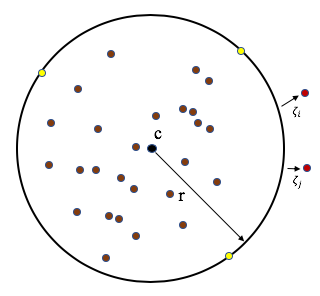

In [3]:
# loading data
file_path = "./save_file/"
X_train = np.load(file_path + "X_train.npy")
y_train = np.load(file_path + "y_train.npy")
X_valid = np.load(file_path + "X_valid.npy")
y_valid = np.load(file_path + "y_valid.npy")

print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)

(10000, 29) (10000,)
(2000, 29) (2000,)


In [4]:
np.unique(y_train, return_counts=True)

(array([1], dtype=int64), array([10000], dtype=int64))

# Construction model

In [67]:
from sklearn.svm import OneClassSVM
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

def conf_matrix(model, X, y):
    y_pred = model.predict(X)
    cm = confusion_matrix(y, y_pred)
    return cm
    
def display(cm):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

In [54]:
model = OneClassSVM()
model.fit(X_train, y_train)


OneClassSVM()

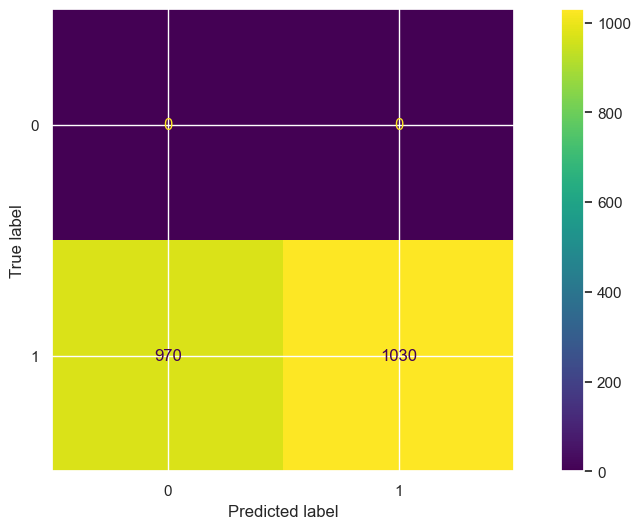

In [69]:
cm = conf_matrix(model, X_valid, y_valid)
display(cm)

In [70]:
cm[1][0]

970

- 970 non-fraud data predicted fraud (FP). I have to optimized parameters to gain the accuracy.
- FN (970) should be minimalized, TP (1030) should be maximized.
- FN -> cm[1][0], TP -> cm[1][1]

In [71]:
optimizer_score = 1 - cm[1][0]/len(y_valid)
optimizer_score

0.515